In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import os
from matplotlib import pyplot as plt

In [3]:
# re-size all the images to this
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
IMAGE_SIZE = [224, 224]

train_path = r"C:\Users\Public\Downloads\train_images"
valid_path = r"C:\Users\Public\Downloads\Test_images"

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
for layer in inception.layers:
    layer.trainable = False

In [7]:
folders = glob(r'C:\Users\Public\Downloads\train_images\*')

In [8]:
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"C:\Users\Public\Downloads\train_images",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2771 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Public\Downloads\Test_images",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 885 images belonging to 5 classes.


In [14]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
87/87 [==============================] - 616s 7s/step - loss: 4.4122 - accuracy: 0.5958 - val_loss: 1.7138 - val_accuracy: 0.7876
Epoch 2/30
87/87 [==============================] - 461s 5s/step - loss: 2.1953 - accuracy: 0.6730 - val_loss: 1.8910 - val_accuracy: 0.7819
Epoch 3/30
87/87 [==============================] - 476s 5s/step - loss: 2.3880 - accuracy: 0.6911 - val_loss: 1.5680 - val_accuracy: 0.7412
Epoch 4/30
87/87 [==============================] - 482s 6s/step - loss: 2.1700 - accuracy: 0.7109 - val_loss: 1.6020 - val_accuracy: 0.7774
Epoch 5/30
87/87 [==============================] - 434s 5s/step - loss: 2.2018 - accuracy: 0.7279 - val_loss: 1.9805 - val_accuracy: 0.7989
Epoch 6/30
87/87 [==============================] - 398s 5s/step - loss: 2.5048 - accuracy: 0.7185 - val_loss: 2.3039 - val_accuracy: 0.7345
Epoch 7/30
87/87 [==============================] - 399s 5s/step - loss: 2.3504 - accuracy: 0.7416 - val_loss: 2.3912 - val_accuracy: 0.7062
Epoch 8/30
87

In [15]:
import matplotlib.pyplot as plt

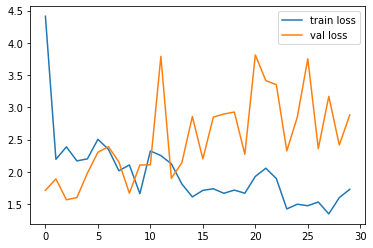

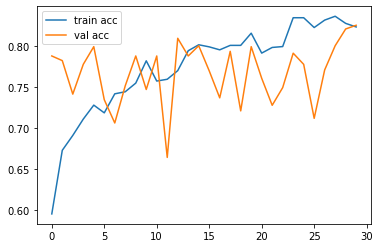

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [65]:
y_pred = model.predict(test_set)
y_pred

28/28 [==============================] - 86s 3s/step


array([[3.3413610e-06, 1.4437741e-07, 9.9999654e-01, 9.6810275e-16,
        4.9759313e-19],
       [9.9681392e-07, 9.9999905e-01, 1.1441367e-11, 4.4770689e-16,
        6.9088587e-20],
       [1.7895729e-13, 1.0000000e+00, 4.1759964e-09, 4.3865256e-17,
        2.5601145e-15],
       ...,
       [3.4432896e-04, 7.7995497e-07, 9.9965489e-01, 8.4001374e-23,
        2.5903254e-24],
       [9.3476831e-26, 4.2907141e-19, 1.0000000e+00, 2.0154992e-37,
        7.9094607e-27],
       [2.8632021e-08, 1.0801928e-10, 1.0000000e+00, 1.5274777e-16,
        4.3734436e-13]], dtype=float32)

In [66]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [214]:
y_pred

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 4, 2, 1, 0,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 4, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2,
       0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 4, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 4, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 4, 0, 2, 4,
       2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,

In [28]:
test_loss, test_acc = model.evaluate(test_set)

28/28 [==============================] - 92s 3s/step - loss: 2.8830 - accuracy: 0.8249


In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_inception.h5')

In [70]:
len(training_set)
len(test_set)

28

In [74]:
img=image.load_img(r"C:\Users\Public\Downloads\Test_images\Severe\2bbd1f99ecc3.png",target_size=(224,224))

In [75]:
x=image.img_to_array(img)
x

array([[[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        ...,
        [3., 1., 2.],
        [2., 2., 2.],
        [3., 3., 3.]],

       [[2., 2., 2.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [3., 1., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        ...,
        [2., 2., 2.],
        [2., 2., 2.],
        [3., 1., 2.]],

       ...,

       [[4., 2., 3.],
        [4., 2., 3.],
        [3., 1., 2.],
        ...,
        [5., 3., 4.],
        [4., 2., 3.],
        [3., 1., 2.]],

       [[3., 1., 2.],
        [4., 2., 3.],
        [3., 1., 2.],
        ...,
        [4., 2., 3.],
        [4., 2., 3.],
        [4., 2., 3.]],

       [[3., 1., 2.],
        [4., 2., 3.],
        [4., 2., 3.],
        ...,
        [2., 0., 1.],
        [4., 2., 3.],
        [4., 2., 3.]]], dtype=float32)

In [76]:
x.shape

(224, 224, 3)

In [77]:
x=x/255

In [78]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [79]:
model.predict(img_data)

1/1 [==============================] - 0s 133ms/step


array([[3.4244982e-07, 9.1740799e-01, 8.2581088e-02, 9.2466444e-06,
        1.2918709e-06]], dtype=float32)

In [80]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 90ms/step


In [69]:
a==1

array([ True])